<a href="https://colab.research.google.com/github/ArturoSirvent/TFG_notebooks/blob/main/single_input/reproduccion_tfg_rodrigo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import numpy as np 
import google.colab as cb
import pandas as pd
import copy

In [ ]:
names=['gamma', 'electron', 'proton', 'helium', 'iron', 'nitrogen', 'silicon']
num_names=len(names)

In [ ]:
#plt.style.available

In [ ]:
#!pip freeze


In [ ]:
"""
esto en principio ya no nos hace falta
lista=[]
for i in names:
  lista.append(pd.read_csv("/content/drive/My Drive/"+i+"_tel_1.dt",sep="  ",names=[1,2,3,4,5,6]))
"""

'\nesto en principio ya no nos hace falta\nlista=[]\nfor i in names:\n  lista.append(pd.read_csv("/content/drive/My Drive/"+i+"_tel_1.dt",sep="  ",names=[1,2,3,4,5,6]))\n'

In [ ]:
"""
#vamos a guardarlo como npy, archivos de numpy
for i in range(num_names):
  nombre="/content/drive/My Drive/"+names[i]+"_raw.npy"
  np.save(nombre,lista[i].to_numpy())
"""
lista=[]
#ahora cargamos los archivos npy
for i in range(num_names):
  nombre="/content/drive/My Drive/"+names[i]+"_raw.npy"
  lista.append(pd.DataFrame(data=np.load(nombre)).rename(columns={0:1,1:2,2:3,3:4,4:5,5:6}))

In [ ]:
"""
#lista=datos_todos.copy()
events=[]
for i in range(num_names):
  events.append(len(lista[i].groupby([1]).mean()))
events

int_max=[]
for i in range(num_names):
  int_max.append(lista[i][5].max())

#rescalamos las intensidades y las que son <0 las ponemos a 0
for i in range(num_names):
  lista[i][5]=lista[i][5].apply(lambda x: 0 if x<0 else x/int_max[i] )


#vamos a reescalarlo como el propone
for i in range(num_names):
  x_minimo=min(lista[i][3])
  y_minimo=min(lista[i][4])
  lista[i][3]=lista[i][3].apply(lambda x: round((x-x_minimo)/333))
  lista[i][4]=lista[i][4].apply(lambda x: round((x-y_minimo)/192))
"""

'\n#lista=datos_todos.copy()\nevents=[]\nfor i in range(num_names):\n  events.append(len(lista[i].groupby([1]).mean()))\nevents\n\nint_max=[]\nfor i in range(num_names):\n  int_max.append(lista[i][5].max())\n\n#rescalamos las intensidades y las que son <0 las ponemos a 0\nfor i in range(num_names):\n  lista[i][5]=lista[i][5].apply(lambda x: 0 if x<0 else x/int_max[i] )\n\n\n#vamos a reescalarlo como el propone\nfor i in range(num_names):\n  x_minimo=min(lista[i][3])\n  y_minimo=min(lista[i][4])\n  lista[i][3]=lista[i][3].apply(lambda x: round((x-x_minimo)/333))\n  lista[i][4]=lista[i][4].apply(lambda x: round((x-y_minimo)/192))\n'

In [ ]:
"""
#ahora reescalamos los píxeles y redondeamos su valor porque no saldra int
#queremos saber cuantos pixeles hay en x e y, esto lo veremos segun cuantos valores de posicion diferentes haya
num_pos_x=len(lista[3].value_counts().axes[0])
num_pos_y=len(lista[4].value_counts().axes[0])
print(num_pos_x,num_pos_y)
"""

'\n#ahora reescalamos los píxeles y redondeamos su valor porque no saldra int\n#queremos saber cuantos pixeles hay en x e y, esto lo veremos segun cuantos valores de posicion diferentes haya\nnum_pos_x=len(lista[3].value_counts().axes[0])\nnum_pos_y=len(lista[4].value_counts().axes[0])\nprint(num_pos_x,num_pos_y)\n'

In [ ]:
"""
#con unique obtenemos las labels unicas sin contar repeticiones 
#posiciones de los pixeles, lo mismo que tomar .axes en el anterior apartado .calue_counts()
pixeles_x=lista[3].unique()
pixeles_y=lista[4].unique()

print((max(lista[4])-min(lista[4]))/92)
print((max(lista[3])-min(lista[3]))/54)

plt.figure(figsize=(8,8))
plt.scatter(lista.loc[lista[1]==600][3].to_numpy(),lista.loc[lista[1]==600][4].to_numpy(),45,marker="H")

#ahora tenemos que decidir como reescalar los pixeles y todo eso rodrigo porpone por 192 y 333
#la dif entre el mayor y el menos es
print(max(pixeles_x)-min(pixeles_x),max(pixeles_y)-min(pixeles_y))
"""

'\n#con unique obtenemos las labels unicas sin contar repeticiones \n#posiciones de los pixeles, lo mismo que tomar .axes en el anterior apartado .calue_counts()\npixeles_x=lista[3].unique()\npixeles_y=lista[4].unique()\n\nprint((max(lista[4])-min(lista[4]))/92)\nprint((max(lista[3])-min(lista[3]))/54)\n\nplt.figure(figsize=(8,8))\nplt.scatter(lista.loc[lista[1]==600][3].to_numpy(),lista.loc[lista[1]==600][4].to_numpy(),45,marker="H")\n\n#ahora tenemos que decidir como reescalar los pixeles y todo eso rodrigo porpone por 192 y 333\n#la dif entre el mayor y el menos es\nprint(max(pixeles_x)-min(pixeles_x),max(pixeles_y)-min(pixeles_y))\n'

In [ ]:
"""
plt.figure(figsize=(8,8))
plt.scatter(lista.loc[lista[1]==600][3].to_numpy(),lista.loc[lista[1]==600][4].to_numpy(),45,marker="H")
"""

'\nplt.figure(figsize=(8,8))\nplt.scatter(lista.loc[lista[1]==600][3].to_numpy(),lista.loc[lista[1]==600][4].to_numpy(),45,marker="H")\n'

In [ ]:
"""
#vamos a agrupar los eventos en una lista
%%time
dat=[]
for i in range(num_names):
  dat.append([])
  for j in lista[i][1].unique():
    dat[i].append(lista[i].loc[lista[i][1]==j][[3,4,5,6]].to_numpy())
  nombre="/content/drive/My Drive/"+names[i]+"_dat_scatter.npy"
  np.save(nombre,dat[i])
"""

'\n#vamos a agrupar los eventos en una lista\n%%time\ndat=[]\nfor i in range(num_names):\n  dat.append([])\n  for j in lista[i][1].unique():\n    dat[i].append(lista[i].loc[lista[i][1]==j][[3,4,5,6]].to_numpy())\n  nombre="/content/drive/My Drive/"+names[i]+"_dat_scatter.npy"\n  np.save(nombre,dat[i])\n'

In [ ]:
"""
#vamos a salvar el gran dat
nombre="/content/drive/My Drive/"+"TODOS"+"_dat_scatter.npy"
np.save(nombre,dat)
"""

'\n#vamos a salvar el gran dat\nnombre="/content/drive/My Drive/"+"TODOS"+"_dat_scatter.npy"\nnp.save(nombre,dat)\n'

In [ ]:
nombre="/content/drive/My Drive/"+"TODOS"+"_dat_scatter.npy"
dat=np.load(nombre,allow_pickle=True)

In [ ]:
"""
dat=[]
for i in range(num_names):
  dat.append([])
  for j in lista[i][1].unique():
    dat[i].append([10,10]*j)
    """

'\ndat=[]\nfor i in range(num_names):\n  dat.append([])\n  for j in lista[i][1].unique():\n    dat[i].append([10,10]*j)\n    '

In [ ]:
"""
datafinal=lista.loc[lista[1]==600][[3,4,5,6]]
#lista.loc[lista[1]==600].get([1,2,3])
#estas dos cosas hacen lo mismo
"""

'\ndatafinal=lista.loc[lista[1]==600][[3,4,5,6]]\n#lista.loc[lista[1]==600].get([1,2,3])\n#estas dos cosas hacen lo mismo\n'

In [ ]:
"""
#creamos una lista vacia y la vamos a ir llenando segun los pixeles activos
dset=[]
for i in range(num_names):
  dset.append(np.zeros((events[i],lista[0][3].max()+1,lista[0][4].max()+1)))
#maxim_rows=np.zeros((events))
for k in range(num_names):
  for i in range(events[k]):
    for j in dat[k][i]:
      dset[k][i,int(j[0]),int(j[1])]=j[2]
np.save("/content/drive/My Drive/imagenes_dset.npy",dset)
"""

'\n#creamos una lista vacia y la vamos a ir llenando segun los pixeles activos\ndset=[]\nfor i in range(num_names):\n  dset.append(np.zeros((events[i],lista[0][3].max()+1,lista[0][4].max()+1)))\n#maxim_rows=np.zeros((events))\nfor k in range(num_names):\n  for i in range(events[k]):\n    for j in dat[k][i]:\n      dset[k][i,int(j[0]),int(j[1])]=j[2]\nnp.save("/content/drive/My Drive/imagenes_dset.npy",dset)\n'

In [ ]:
dset=np.load("/content/drive/My Drive/imagenes_dset.npy",allow_pickle=True)

In [ ]:
"""
%%time
#Tenemos huevos en blanco ,que que pasa si les hacemos la media de sus vecinos
for k in range(dset.shape[0]):
  for i in range(dset.shape[1]-1):
    for j in range(dset.shape[2]-1):
      if (dset[k][i,j]<0.0001):
        dset[k][i,j]=(dset[k][i-1,j]+dset[k][i+1,j]+dset[k][i,j+1]+dset[k][i,j-1])/4
      else:
        pass
"""

'\n%%time\n#Tenemos huevos en blanco ,que que pasa si les hacemos la media de sus vecinos\nfor k in range(dset.shape[0]):\n  for i in range(dset.shape[1]-1):\n    for j in range(dset.shape[2]-1):\n      if (dset[k][i,j]<0.0001):\n        dset[k][i,j]=(dset[k][i-1,j]+dset[k][i+1,j]+dset[k][i,j+1]+dset[k][i,j-1])/4\n      else:\n        pass\n'

In [ ]:
"""
for i in range(events):
  maxim=dset[i].argmax()
  #la row será
  maxim=maxim % dset[i].shape[1]
  for j in range(dset[i].shape[0]):
    if j==maxim:
      maxim_rows[i]=j
      dset[i][j]+=0.05
"""

'\nfor i in range(events):\n  maxim=dset[i].argmax()\n  #la row será\n  maxim=maxim % dset[i].shape[1]\n  for j in range(dset[i].shape[0]):\n    if j==maxim:\n      maxim_rows[i]=j\n      dset[i][j]+=0.05\n'

<Figure size 432x288 with 0 Axes>

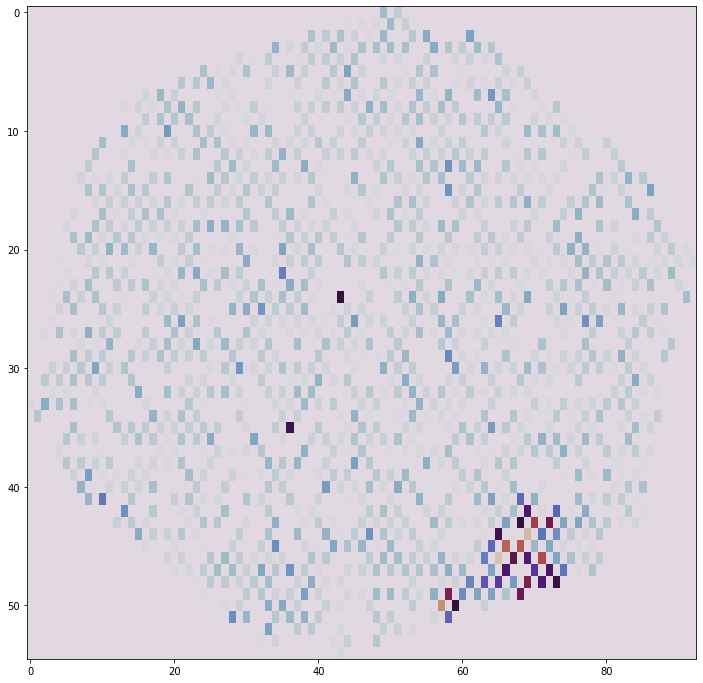

In [ ]:
plt.set_cmap("twilight")
plt.figure(figsize=(12,12))
n=100
plt.imshow(dset[2][n], interpolation='none',aspect='auto')
#plt.plot((-10*dset[n][int(maxim_rows[n])]+np.ones(dset[n].shape[1])*50),"-k",alpha=0.6)

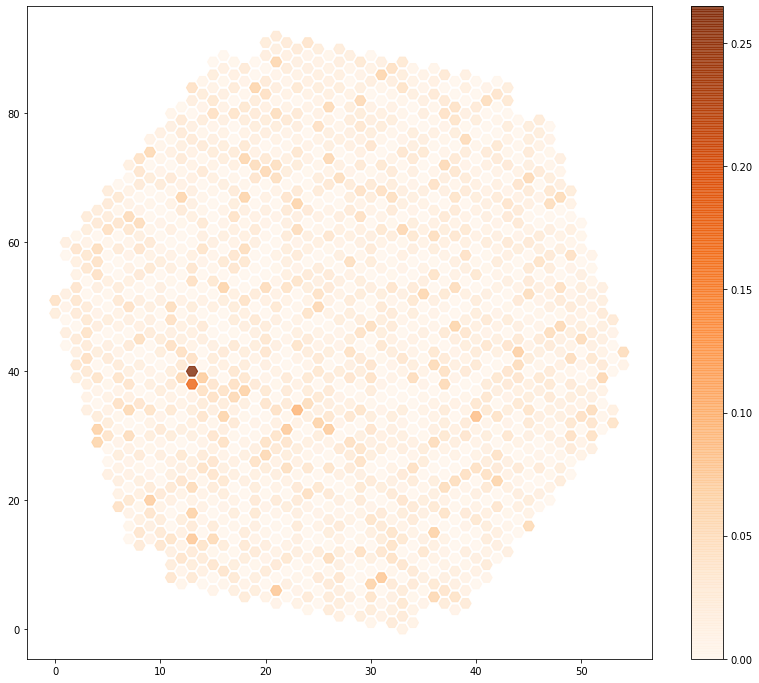

In [ ]:
plt.figure(figsize=(14,12))
n=101
particula=4
plt.scatter(dat[particula][n][:,0],dat[particula][n][:,1],s=125,c=dat[particula][n][:,2],marker="H",cmap="Oranges",alpha=0.8)
plt.colorbar()

In [ ]:
#ahora vamos a reproducir la red neuronal que crea para clasificar los datos en 
#gamma y electron
dset_gamma=copy.deepcopy(dset[0])
dset_electron=copy.deepcopy(dset[1])
labels_gamma=np.ones(dset_gamma.shape[0])
labels_electron=np.zeros(dset_electron.shape[0])
data=np.concatenate((dset_gamma,dset_electron),axis=0)
labels=np.concatenate((labels_gamma,labels_electron),axis=0)

In [ ]:
import sklearn
import tensorflow as tf
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(data,labels,test_size=0.20, random_state=3)
#aun tenemos que hacer que eso sean datos pa darle a la red


In [ ]:
input_shape=(55,93)
canales_color=1
numClasses=2

In [ ]:
#creamos la red neuronal
#lo hacemos igual que rodrigo
model = tf.keras.models.Sequential()
#nos da igual el input inicial siempre que siempre sea el mismo, creo
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(numClasses, activation=tf.nn.softmax))
model.compile(optimizer='RMSprop',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
x_train.shape

(11771, 55, 93)

In [ ]:
model.summary()


In [ ]:
EPOCHS=30
history=model.fit(x_train,y_train,epochs=EPOCHS,validation_split=0.15)

Epoch 1/30
313/313 [==============================] - 3s 10ms/step - loss: 0.0580 - accuracy: 0.9828 - val_loss: 0.0067 - val_accuracy: 0.9977
Epoch 2/30
313/313 [==============================] - 3s 9ms/step - loss: 0.0262 - accuracy: 0.9952 - val_loss: 0.0060 - val_accuracy: 0.9989
Epoch 3/30
313/313 [==============================] - 3s 11ms/step - loss: 0.0240 - accuracy: 0.9956 - val_loss: 0.0053 - val_accuracy: 0.9983
Epoch 4/30
313/313 [==============================] - 3s 9ms/step - loss: 0.0236 - accuracy: 0.9960 - val_loss: 0.0049 - val_accuracy: 0.9989
Epoch 5/30
313/313 [==============================] - 3s 9ms/step - loss: 0.0219 - accuracy: 0.9959 - val_loss: 0.0036 - val_accuracy: 0.9983
Epoch 6/30
313/313 [==============================] - 3s 10ms/step - loss: 0.0196 - accuracy: 0.9963 - val_loss: 0.0042 - val_accuracy: 0.9983
Epoch 7/30
313/313 [==============================] - 3s 9ms/step - loss: 0.0218 - accuracy: 0.9958 - val_loss: 0.0037 - val_accuracy: 0.9989
Epo

In [ ]:
val_loss, val_acc = model.evaluate(x_test, y_test)
# print(val_loss)
print(val_acc)

from sklearn.metrics import classification_report, confusion_matrix
y_pred = model.predict_classes(x_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

92/92 [==============================] - 0s 2ms/step - loss: 0.0157 - accuracy: 0.9976
0.997621476650238
[[ 542    3]
 [   4 2394]]
              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99       545
         1.0       1.00      1.00      1.00      2398

    accuracy                           1.00      2943
   macro avg       1.00      1.00      1.00      2943
weighted avg       1.00      1.00      1.00      2943



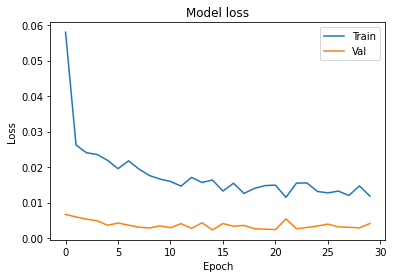

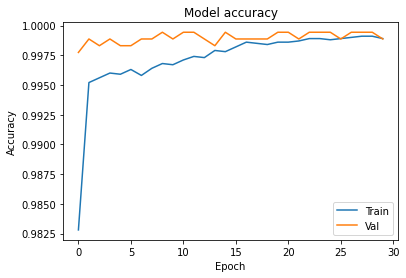

In [ ]:
hist=history
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

In [ ]:
#debemos de añadir una dimension para los canales, que en este caso es solo 1 pero en RGB es 3
numChannels=1
x_train=x_train[...,np.newaxis]
#XX_train=x_train.reshape(x_train.shape[0], *input_shape, numChannels) 
# funcionan igual

Y_train=y_test[...,np.newaxis]
x_test=x_test[...,np.newaxis]
y_test=y_test[...,np.newaxis]


In [ ]:
x_train.shape

(11771, 55, 93, 1)

In [ ]:
#COPIADO TALCUAL
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D

def create_model(padding='same',stride=2,pool=2,filters=64,kernel=5,hidden_layers=2,neurons=20,optimizer='Adadelta',
                 learn_rate=0.001, init_mode='glorot_normal', activation='relu', dropout_rate=0.4,
                 weight_constraint=None,weight_regularizer=None, batchn=0,conv=2, n_filters=2):#parameters here are default

    # initialize the model
    model = Sequential()                                                                       

    for i in range (conv):
        num=int(round(filters*(2**(i-1))))
        for i in range (n_filters):
              model.add(Conv2D(num, kernel, padding=padding,activation=activation,kernel_initializer=init_mode,kernel_constraint=weight_constraint,kernel_regularizer=weight_regularizer))
        model.add(MaxPooling2D(pool_size=(pool, pool), strides=(stride, stride)))
        # model.add(Dropout(dropout_rate))
    # define the first FC => ACTIVATION layers
    model.add(Flatten())
    if (batchn==1):
        model.add(BatchNormalization())     
    model.add(Dropout(dropout_rate)) 
    for i in range(hidden_layers):
        model.add(Dense(neurons,kernel_initializer=init_mode,  activation=activation,kernel_regularizer=weight_regularizer)) 
        if (batchn==1):
            model.add(BatchNormalization())    #, use_bias=False
        model.add(Dropout(dropout_rate)) 
    # lastly, define the soft-max classifier
    model.add(Dense(numClasses, activation='softmax'))

    if (optimizer=='SGD'):
        optimizer = keras.optimizers.SGD(lr=0.001, decay=1e-6, momentum=0.9, nesterov=True)
    elif (optimizer=='RMS'):
        optimizer=keras.optimizers.RMSprop(learning_rate=0.001, rho=0.9)
    elif (optimizer=='Adagrad'):
        optimizer=keras.optimizers.Adagrad(learning_rate=0.01)
    elif (optimizer=='Adadelta'):
        optimizer=keras.optimizers.Adadelta(learning_rate=1.0, rho=0.95)
    elif (optimizer=='Adamax'):
        optimizer=keras.optimizers.Adamax(learning_rate=0.002, beta_1=0.9, beta_2=0.999)
    elif (optimizer=='Nadam'):
        optimizer=keras.optimizers.Nadam(learning_rate=0.002, beta_1=0.9, beta_2=0.999)
    elif (optimizer=='Adam'):
        optimizer=keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, amsgrad=False)

    model.compile(optimizer=optimizer,loss='sparse_categorical_crossentropy',metrics=['accuracy'])              

    return model


shape=x_train.shape
model=create_model()
model.build(shape) 
model.summary()
model=create_model()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (11771, 55, 93, 32)       832       
_________________________________________________________________
conv2d_1 (Conv2D)            (11771, 55, 93, 32)       25632     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (11771, 27, 46, 32)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (11771, 27, 46, 64)       51264     
_________________________________________________________________
conv2d_3 (Conv2D)            (11771, 27, 46, 64)       102464    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (11771, 13, 23, 64)       0         
_________________________________________________________________
flatten (Flatten)            (11771, 19136)            0

In [ ]:
history=model.fit(x_train, y_train, epochs=60,batch_size=128, validation_data=(x_test, y_test))


Epoch 1/60
92/92 [==============================] - 6s 67ms/step - loss: 0.2525 - accuracy: 0.9027 - val_loss: 0.0384 - val_accuracy: 0.9929
Epoch 2/60
92/92 [==============================] - 5s 58ms/step - loss: 0.0844 - accuracy: 0.9832 - val_loss: 0.0243 - val_accuracy: 0.9935
Epoch 3/60
92/92 [==============================] - 5s 58ms/step - loss: 0.0474 - accuracy: 0.9908 - val_loss: 0.0287 - val_accuracy: 0.9952
Epoch 4/60
92/92 [==============================] - 5s 58ms/step - loss: 0.0422 - accuracy: 0.9923 - val_loss: 0.0219 - val_accuracy: 0.9956
Epoch 5/60
92/92 [==============================] - 5s 58ms/step - loss: 0.0360 - accuracy: 0.9936 - val_loss: 0.0160 - val_accuracy: 0.9956
Epoch 6/60
92/92 [==============================] - 5s 59ms/step - loss: 0.0340 - accuracy: 0.9941 - val_loss: 0.0240 - val_accuracy: 0.9956
Epoch 7/60
92/92 [==============================] - 5s 59ms/step - loss: 0.0319 - accuracy: 0.9946 - val_loss: 0.0174 - val_accuracy: 0.9963
Epoch 8/60
92

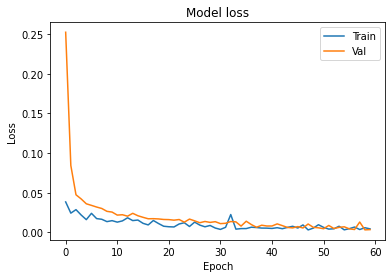

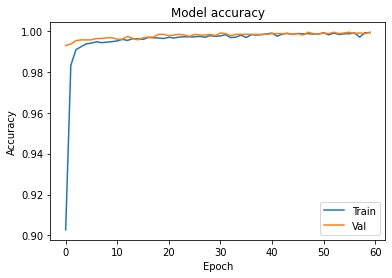

In [ ]:
plt.plot(history.history['val_loss'])
plt.plot(history.history['loss'])

plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

In [ ]:
model.save("/content/drive/My Drive/modelo_convolucion_1.h5")